In [1]:
from tools.data import DreemDatasets
from preprocessing.features import ExtractFeatures, ExtractBands
import numpy as np
import matplotlib.pyplot as plt

## Test extract bands

In [2]:
use_datasets = ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6']
features = ['min', 'max', 'energy', 'mmd', 'esis']

In [3]:
dataset_transforms = {
    "eeg_1": ExtractBands(bands='*'),
    "eeg_2": ExtractBands(bands='*'),
    "eeg_3": ExtractBands(bands='*'),
    "eeg_4": ExtractBands(bands='*'),
    "eeg_5": ExtractBands(bands='*'),
    "eeg_6": ExtractBands(bands='*')
}

In [4]:
train_set, val_set = DreemDatasets('dataset/train.h5', 'dataset/train_y.csv', 
                                   keep_datasets=use_datasets, split_train_val=0.8, seed=0,
                                   size=5000, transforms={}).get()

train_set.load_data()  # Charge en mémoire. Peut-être un peu long

train_set.close()  # On ferme les fichiers h5
val_set.close()

train_set_bands, val_set_bands = DreemDatasets('dataset/train.h5', 'dataset/train_y.csv', 
                                               keep_datasets=use_datasets, split_train_val=0.8, seed=0,
                                               size=5000, transforms=dataset_transforms).get()
train_set_bands.load_data()

train_set_bands.close()  # On ferme les fichiers h5
val_set_bands.close()

"train_set_bands, val_set_bands = DreemDatasets('dataset/train.h5', 'dataset/train_y.csv', \n                                               keep_datasets=use_datasets, split_train_val=0.8, seed=0,\n                                               size=5000, transforms=dataset_transforms).get()\ntrain_set_bands.load_data()\n\ntrain_set_bands.close()  # On ferme les fichiers h5\nval_set_bands.close()"

In [5]:
data, _, target = train_set[0:2]
data_bands, _, target_bands = train_set_bands[0:2]

data = data.detach().numpy()
data_bands = data_bands.detach().numpy()

print(data.shape)
print(data_bands.shape)

(6, 2, 1500)


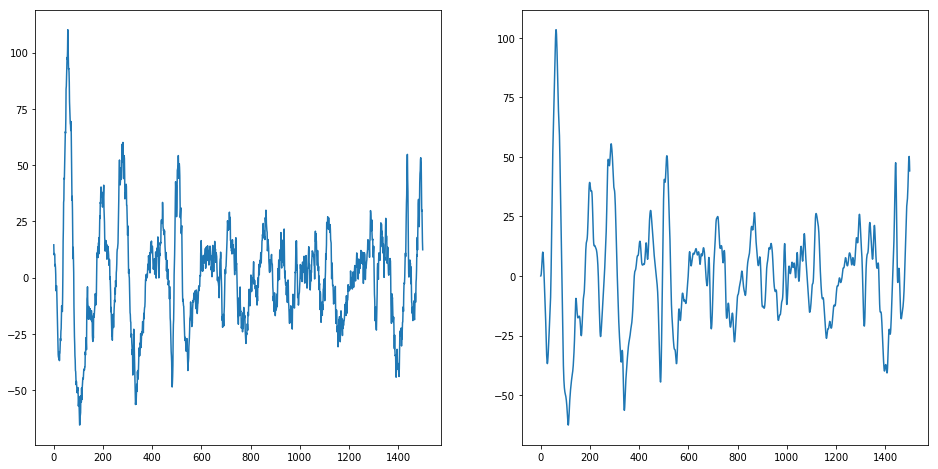

In [58]:
plt.figure(0, figsize=(16, 8))
plt.subplot('121')
plt.plot(data[0, 0, :])
plt.subplot('122')

plt.plot(data_bands[0, 0, 0, :])

## Test features

2.2360630667134274
2.2360316378532685
2.235968781016462
2.235874497970062
2.2357487913647276
2.2355916647348146
2.235403122498503
2.22636636125574
2.235403122498503
2.2355916647348146
2.235748791364727
2.2358744979700615
2.235968781016462
2.2360316378532685
2.2360630667134274
75
25
2.236330063593836
[[33.52772949]]


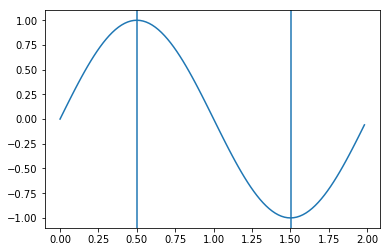

In [2]:
f_samp = 50

extract_features = ExtractFeatures(['esis'], sampling_freq=f_samp)

t = np.linspace(0, 30, 30*f_samp)

y = np.sin(2*np.pi*t*0.5)

y_feat = extract_features(np.expand_dims(y, 0))

plt.plot(t[:100], y[:100])
plt.axvline(x=t[np.argmin(y[:100])])

plt.axvline(x=t[np.argmax(y[:100])])

print(np.argmin(y[:100]))

print(np.argmax(y[:100]))

print(np.sqrt((max(y[100:200]) - min(y[100:200]))**2 + (t[np.argmax(y[100:200])] - t[np.argmin(y[100:200])])**2))
print(y_feat)
